<a href="https://colab.research.google.com/github/shubhangi-25/Machine-Learning-Dataset/blob/main/Twitter_tweets_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries


In [6]:
import sklearn
import numpy as np
import pandas as pd

In [7]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Loading Data


In [8]:
# training data
train = pd.read_csv("/content/train.csv")

# test data
test = pd.read_csv("/content/test.csv")

*
Data Exploration (Exploratory Data Analysis)*

In [9]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


Shape of data

In [11]:
print(train.shape)
print(test.shape)
train.head()

(31962, 3)
(17197, 2)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [12]:
# non-racist/sexist related tweets
sum(train["label"] == 0)

29720

In [13]:
# racist/sexist related tweets
sum(train["label"] == 1)

2242

Distribution of Reviews in Training data


In [14]:
negative= train[train.label==0].shape[0]
positive= train[train.label==1].shape[0]

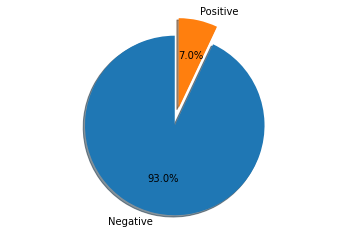

In [15]:
labels = 'Negative', 'Positive'
sizes = [negative, positive]
explode = (0.1, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow = True, startangle=90)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Data information

In [16]:
df = train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB




Checking for Null values

In [17]:
# check if there are any missing values
df.isnull().sum()
#train.isnull().values.any()

id       0
label    0
tweet    0
dtype: int64

Datatypes of all columns



In [18]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

Rows and columns in the dataset

In [19]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   3
Count of rows in the data is:   31962


Check unique Target Values


In [20]:
df['label'].unique()

array([0, 1])

Data Visualization of Target Variables

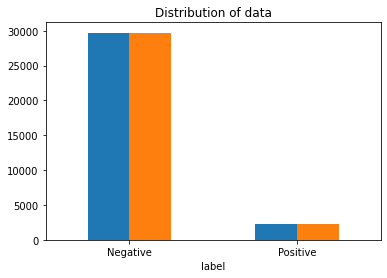

In [21]:
# Plotting the distribution for dataset.
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['tweet']), list(df['label'])

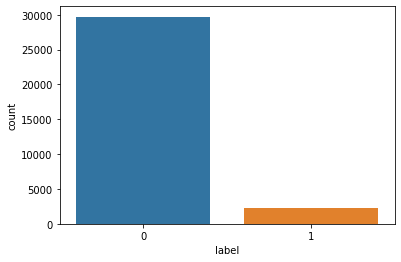

In [22]:
import seaborn as sns
sns.countplot(x='label', data=df)

Data cleaning

In [23]:
#install tweet-preprocessor to clean tweets
!pip install tweet-preprocessor

In [24]:
# remove special characters using the regular expression library
import re

#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [25]:
import preprocessor as p

# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [26]:
# clean training data
train_tweet = clean_tweets(train["tweet"])
train_tweet = pd.DataFrame(train_tweet)

In [27]:
# append cleaned tweets to the training data
train["clean_tweet"] = train_tweet

# compare the cleaned and uncleaned tweets
train.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now
5,6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before they ...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so


In [28]:
# clean the test data and append the cleaned tweets to the test data
test_tweet = clean_tweets(test["tweet"])
test_tweet = pd.DataFrame(test_tweet)
# append cleaned tweets to the training data
test["clean_tweet"] = test_tweet

# compare the cleaned and uncleaned tweets
test.tail()

,id,tweet,clean_tweet
17192,49155,thought factory: left-right polarisation! #tru...,thought factory left right polarisation &gt3
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,today in omg &amp used words like assets&ampli...
17195,49158,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...
17196,49159,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download


Splitting our data into Train and Test Subset

In [29]:
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = train.label.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(train.clean_tweet.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

Vectorize tweets using CountVectorizer

In [30]:

from sklearn.feature_extraction.text import CountVectorizer

# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

Model building
(Apply Support Vetor Classifier (SVC))
Use SVM: 94% Accuracy


In [50]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_vec,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
y_pred= svc.predict(x_test_vec)

In [40]:
print(y_pred)


[0 0 0 ... 0 0 1]


Accuracy score for SVC

In [41]:
svc.score(x_test_vec, y_test)


0.947752633225571

In [42]:

from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  94.86912086766085 %


Use XGBoost Classifier: 93% Accuracy

In [43]:
import xgboost as xgb
model=xgb.XGBClassifier()
model.fit(x_train_vec, y_train)
model.score(x_test_vec,y_test)


0.9387840233601001

Use Random Forest: 95% Accuracy


In [44]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
rf=ensemble.RandomForestClassifier()
rf.fit(x_train_vec,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_pred=rf.predict(x_test_vec)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8916
           1       0.68      0.46      0.55       673

    accuracy                           0.95      9589
   macro avg       0.82      0.72      0.76      9589
weighted avg       0.94      0.95      0.94      9589



Use Multinomial Naive Bayes Classifier: 93% Accuracy


In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
clf = MultinomialNB()
clf.fit(x_train_vec, y_train)
y_pred = clf.predict(x_test_vec)
print("ACCURACY OF SKLEARN NAIVEBAYES: ",clf.score(x_test_vec,y_test))


ACCURACY OF SKLEARN NAIVEBAYES:  0.9310668474293461
